<a href="https://colab.research.google.com/github/jee365/ESAA/blob/main/%EC%A4%91%EA%B0%84_%EB%B0%9C%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##단순 신경망 훈련

In [112]:
import tensorflow as tf

#10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

모델 구조

In [113]:
import tensorflow as tf

#리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1),

])

In [114]:
#add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))


입력 데이터 형태

In [115]:
import tensorflow as tf
model = tf.keras.Sequential([
        #입력 데이터의 shape(150,4)인 경우 input_shape 지정
        tf.keras.layers.Dense(10, input_shape=[4]),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1),
])

단순선형회귀 모델

In [116]:
#단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])
#use_bias=False이면 상수항 b를 포함하지 않음

In [117]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


컴파일

In [118]:
#긴 문자열 지정
model.compile(optimizer='sgd',loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

In [119]:
#짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse','mae'])

In [120]:
#클래스 인스턴트지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.05),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                      ])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


훈련

In [121]:
import numpy as np

x= np.arange(1,6)
y= 3*x + 2
print(x)
print(y)


[1 2 3 4 5]
[ 5  8 11 14 17]


In [122]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 336ms/step - loss: 14.8784 - mean_absolute_error: 14.8784 - mean_squared_error: 258.2222
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 14.3784 - mean_absolute_error: 14.3784 - mean_squared_error: 241.0631
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 13.8784 - mean_absolute_error: 13.8784 - mean_squared_error: 224.4941
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 13.3784 - mean_absolute_error: 13.3784 - mean_squared_error: 208.5150
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 12.8784 - mean_absolute_error: 12.8784 - mean_squared_error: 193.1260


In [123]:
#단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

In [124]:
#컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

#훈련
history = model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 322ms/step - loss: 170.8420 - mae: 12.1613
Epoch 2/1200
1/1 [==============================] - 0s 6ms/step - loss: 99.6309 - mae: 9.3226
Epoch 3/1200
1/1 [==============================] - 0s 10ms/step - loss: 58.1321 - mae: 7.1554
Epoch 4/1200
1/1 [==============================] - 0s 4ms/step - loss: 33.9482 - mae: 5.5009
Epoch 5/1200
1/1 [==============================] - 0s 6ms/step - loss: 19.8545 - mae: 4.2378
Epoch 6/1200
1/1 [==============================] - 0s 6ms/step - loss: 11.6410 - mae: 3.2734
Epoch 7/1200
1/1 [==============================] - 0s 6ms/step - loss: 6.8540 - mae: 2.5371
Epoch 8/1200
1/1 [==============================] - 0s 8ms/step - loss: 4.0640 - mae: 1.9749
Epoch 9/1200
1/1 [==============================] - 0s 6ms/step - loss: 2.4376 - mae: 1.5456
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 1.4893 - mae: 1.2177
Epoch 11/1200
1/1 [==============================] - 0s 9

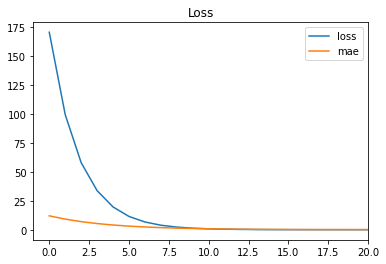

In [125]:
import matplotlib.pyplot as plt

#20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

10 epoch까지 손실이 급격하게 감소

In [126]:
#검증
model.evaluate(x,y)

1/1 [==============================] - 0s 147ms/step - loss: 5.2250e-05 - mae: 0.0062


[5.2249524742364883e-05, 0.006204414181411266]

In [127]:
#예측
model.predict([10])

array([[32.029987]], dtype=float32)

##심층 신경망으로 이미지 분류

케라스 내장 데이터셋 로드


In [128]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [129]:
#load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [130]:
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


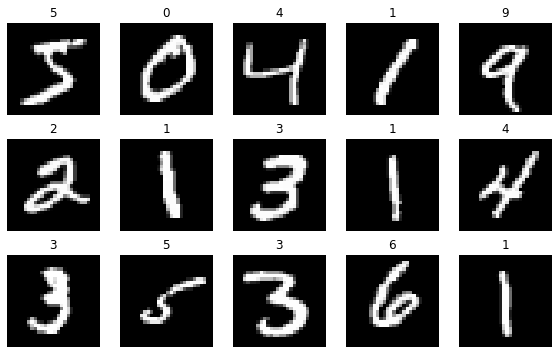

In [131]:
#데이터 시각화
import matplotlib.pyplot as plt

#canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  #imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

데이터 전처리

In [132]:
#x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [133]:
#픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

#데이터 정규화
x_train = x_train / x_train.max()

#정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [134]:
#test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [135]:
x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

flatten 레이어

In [136]:
#2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없어 데이터를 1차원으로 전처리하여 주입
x_train.reshape(60000,-1).shape

(60000, 784)

In [137]:
#Faltten 레이어 적용 후 shape 확인
tf.keras.layers.Flatten()(x_train).shape

TensorShape([60000, 784])

활성화 함수

In [138]:
#Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128,activation='relu')

In [139]:
#Dense 레이어 다음에 배치 정규화를 적용한 후 relu 활성화 함수 레이어 별도로 적용
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

입력과 출력

In [140]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(32,activation='relu'),
        #노드 = 10개(클라스 개수와 동일)
        tf.keras.layers.Dense(10,activation='softmax')                   
])

In [141]:
#출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1,activation='sigmoid')

#출력층 노드 = 2인 경우, softmax
tf.keras.layers.Dense(10,activation='softmax')


손실함수

In [142]:
#이진 분류(출력 노드 개수 =1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [143]:
#출력 노드 개수(mnist에서 클래스의 개수)가 2개 이상
#y가 원핫 벡터인 경우
model.compile(loss='categorical_crossentropy')
#y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

옵티마이저

In [144]:
#대체로 adam 사용
#클래스 인스턴트로 지정
adam = tf.keras.optimizers.Adam(lr=0.001) #하이퍼파라미터 직정 설정
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


평가지표(acc, auc, precision, recall)

In [145]:
#클래스 인스턴트로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [146]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

훈련

In [147]:
model.fit(x_train, y_train,
          #검증 셋 지정(매 epoch마다 훈련 손실, 검증 손실, 평가지표 출력)
          validation_data = (x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2292 - accuracy: 0.9319 - val_loss: 0.1206 - val_accuracy: 0.9628
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0962 - accuracy: 0.9706 - val_loss: 0.0917 - val_accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0672 - accuracy: 0.9793 - val_loss: 0.0808 - val_accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0528 - accuracy: 0.9831 - val_loss: 0.0733 - val_accuracy: 0.9767
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0408 - accuracy: 0.9866 - val_loss: 0.0932 - val_accuracy: 0.9736
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0978 - val_accuracy: 0.9742
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0854 - val_accuracy

평가

In [148]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9761
검증 셋 정확도: 0.9761000275611877


예측

In [149]:
predictions = model.predict(x_test)

In [150]:
#예측 결과 출력
predictions[0] #7이 제일 높네!

array([3.8480351e-11, 8.3963691e-08, 4.1562508e-08, 9.0034933e-07,
       5.3707094e-10, 7.0823086e-10, 3.5310048e-16, 9.9999774e-01,
       3.1981127e-08, 1.2177661e-06], dtype=float32)

In [151]:
import numpy as np

#0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10],axis=1))


7
[7 2 1 0 4 1 4 9 5 9]


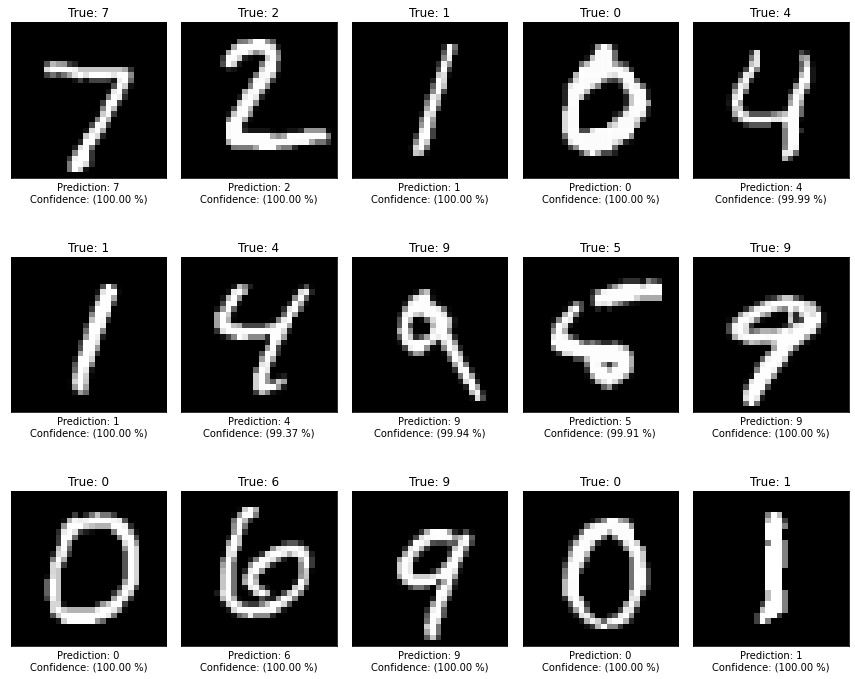

In [152]:
#데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

#canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  #imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

초기값 설정

In [153]:
dense = tf.keras.layers.Dense(256,activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [154]:
#문자열 초기화
dense = tf.keras.layers.Dense(256,kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

#클래스 인스턴스 초기화
he_normal=tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal,activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


드롭아웃(과대적합 방지)

In [155]:
tf.keras.layers.Dropout(0,25)

배치 정규화

In [156]:
#Model A: Dense + ReLU
model_a = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64,activation='relu'),
          tf.keras.layers.Dense(32,activation='relu'),
          tf.keras.layers.Dense(10,activation='softmax'),                   
])

model_a.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_90 (Dense)            (None, 64)                50240     
                                                                 
 dense_91 (Dense)            (None, 32)                2080      
                                                                 
 dense_92 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [157]:
#Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64),
          #배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          #배치 정규화 후 활성화 함수 적용
          tf.keras.layers.Activation('relu'),

          tf.keras.layers.Dense(32),
          #배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          #배치 정규화 후 활성화 함수 적용
          tf.keras.layers.Activation('relu'),
          
          tf.keras.layers.Dense(10,activation='softmax'),                   
])

model_b.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_93 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                                 
 dense_94 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                     

활성화 함수

In [158]:
#LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

#LeakyReLu, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [159]:
#Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64),
          #배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          #LeakyReLU, alpha = 0.2 적용
          tf.keras.layers.LeakyReLU(alpha=0.2),

          tf.keras.layers.Dense(32),
          #배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          #LeakyReLU, alpha = 0.2 적용
          tf.keras.layers.LeakyReLU(alpha=0.2),
          
          tf.keras.layers.Dense(10,activation='softmax'),                   
])

model_c.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_96 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_10 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 64)                0         
                                                                 
 dense_97 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_11 (Bat  (None, 32)               128       
 chNormalization)                                    

In [160]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train,
                        validation_data=(x_test,y_test),
                        epochs=10)

#Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train,
                        validation_data=(x_test,y_test),
                        epochs=10)

#Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train,
                        validation_data=(x_test,y_test),
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2989 - accuracy: 0.9110 - val_loss: 0.1586 - val_accuracy: 0.9504
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1277 - accuracy: 0.9615 - val_loss: 0.1084 - val_accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0917 - accuracy: 0.9722 - val_loss: 0.1041 - val_accuracy: 0.9695
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0723 - accuracy: 0.9775 - val_loss: 0.0956 - val_accuracy: 0.9714
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9817 - val_loss: 0.0887 - val_accuracy: 0.9747
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0916 - val_accuracy: 0.9746
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0426 - accuracy: 0.9863 - val_loss: 0.0995 - val_accuracy:

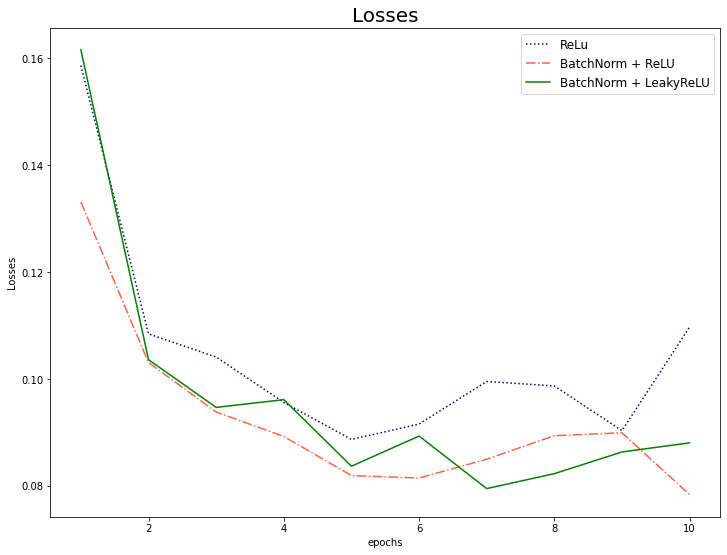

In [161]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11),history_a.history['val_loss'],color='navy',linestyle=':')
plt.plot(np.arange(1,11),history_b.history['val_loss'],color='tomato',linestyle='-.')
plt.plot(np.arange(1,11),history_c.history['val_loss'],color='green',linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLu','BatchNorm + ReLU','BatchNorm + LeakyReLU'],fontsize=12)
plt.show()


모델 저장 및 불러오기

In [162]:
#모델을 h5 포멧으로 저장
model.save('h5-model.h5')

In [163]:
#모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_81 (Dense)            (None, 256)               200960    
                                                                 
 dense_82 (Dense)            (None, 64)                16448     
                                                                 
 dense_83 (Dense)            (None, 32)                2080      
                                                                 
 dense_84 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [164]:
#모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.09112, acc: 0.97610


In [165]:
#모델을 SavedModel 포맷으로 저장
model.save('saved-model')

INFO:tensorflow:Assets written to: saved-model/assets


In [166]:
#모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_81 (Dense)            (None, 256)               200960    
                                                                 
 dense_82 (Dense)            (None, 64)                16448     
                                                                 
 dense_83 (Dense)            (None, 32)                2080      
                                                                 
 dense_84 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________
